# COMP20230 - Assignment 2

In [1]:
from scipy.optimize import curve_fit
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Section 1 - Sorting Algorithms

### Section 1.1 - Implement Sorting Algorithms

#### Bubble Sort

In [2]:
def bubble_sort(*args):
    """Implementation of the Bubble Sort Algorithm
    
    For each index in the array, comparison operations are performed to push the largest element to the top of the array
    Once the element is at the top of the array, we forget about it, and move onto the previous position in the array
    We do this until no more comparison operations have been performed - indicating that the array has been sorted
    Reference: https://stackabuse.com/bubble-sort-in-python/
    """
    our_list = args[0]

    has_swapped = True

    num_of_iterations = 0

    while(has_swapped):
        has_swapped = False
        for i in range(len(our_list) - num_of_iterations - 1):
            if our_list[i] > our_list[i+1]:
                # Swap
                our_list[i], our_list[i+1] = our_list[i+1], our_list[i]
                has_swapped = True
        num_of_iterations += 1

    return our_list

#### Quick Sort

In [3]:
def quick_sort(*args):
    """Implementation of the Quick Sort Algorithm
    
    Reference: COMP20230 lab material
    """
    data = args[0]

    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quick_sort(less) + equal + quick_sort(greater)

    else:
        return data

#### Merge Sort

In [4]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def merge_sort(*args):
    """Implementation of the Merge Sort Algorithm
    
    Reference: COMP20230 lab material
    """
    arr = args[0]

    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = merge_sort(left)
    right = merge_sort(right)
    return list(merge(left, right))

In [5]:
test_arr = [4, 3, 2, 1]
print(bubble_sort(test_arr))
print(quick_sort(test_arr, 0, 3))
print(merge_sort(test_arr))

[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]


### Section 1.2: Create the input lists

In [6]:
def input_list_generator(n):
    """Function for generating input lists for the sorting algorithm runtime analysis
    
    Input = the number of lists you wish to generate
    Output = a list of len = input containing lists of len in the range 0 to input - 1
    """

    inputs = []

    for i in range(1, n+1):
        inputs.append([x for x in range(i-1, -1, -1)])

    return inputs

In [7]:
inputs = input_list_generator(1000)

### Section 1.3: Create helper functions

#### Create function to calculate runtimes

In [8]:
def get_runtimes(*args, funct=bubble_sort):
    """Function that takes in a series of positional arguments and a function and returns the runtime of function(arguments)"""
        
    # Compute the runtime of the algorithm using the timeit module
    start = timeit.default_timer()
    funct(*args)
    stop = timeit.default_timer()
    runtime = stop - start

    return runtime

In [9]:
print(get_runtimes(test_arr, funct=bubble_sort))
print(get_runtimes(test_arr, funct=quick_sort))
print(get_runtimes(test_arr, funct=merge_sort))

9.500014130026102e-06
1.3400014722719789e-05
2.2199994418770075e-05


### Section 1.4: Calculate the sorting algorithm runtimes

In [10]:
def sorting_runtime_calculator(inputs, funct=bubble_sort):
    """Function to calculate the runtimes of sorting algorithms
    
    Input = Input list and the sorting algorithm
    Output = A list of runtimes
    """

    average_runtimes = []
    number_of_runs = 5

    for input in inputs:
        if len(input) % 100 == 0:
            print(len(input))

        all_runtimes = np.zeros(shape=(number_of_runs, 1))

        for i in range(number_of_runs):
            all_runtimes[i] = get_runtimes(input, funct=funct)

        average_runtimes.append(np.mean(all_runtimes))

    return average_runtimes

In [11]:
bubble_runtimes = sorting_runtime_calculator(inputs, bubble_sort)
quick_sort_runtimes = sorting_runtime_calculator(inputs, quick_sort)
merge_sort_runtimes = sorting_runtime_calculator(inputs, merge_sort)

100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000


### Section 1.5: Plot Results

Text(0.5, 1.0, 'Sorting Algorithm Runtime Analysis')

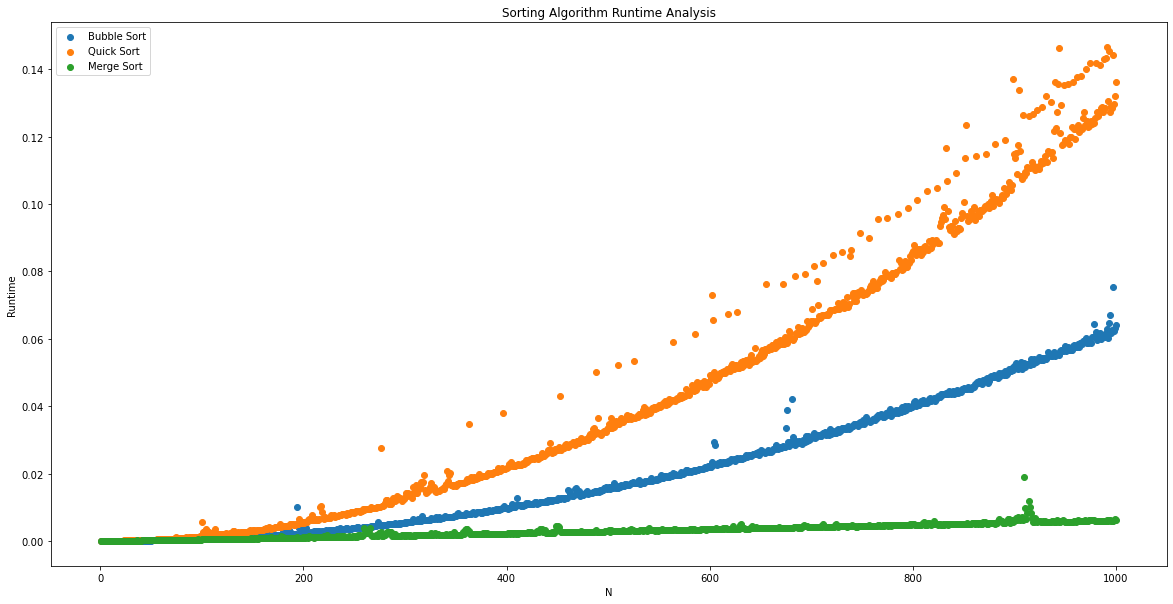

In [13]:
n_list = [x for x in range(1, 1001)]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(n_list, bubble_runtimes, label="Bubble Sort")
ax.scatter(n_list, quick_sort_runtimes, label="Quick Sort")
ax.scatter(n_list, merge_sort_runtimes, label="Merge Sort")
plt.legend()
plt.xlabel("N")
plt.ylabel("Runtime")
plt.title("Sorting Algorithm Runtime Analysis")

#### Zoom in on Merge Sort

(0.0, 0.008)

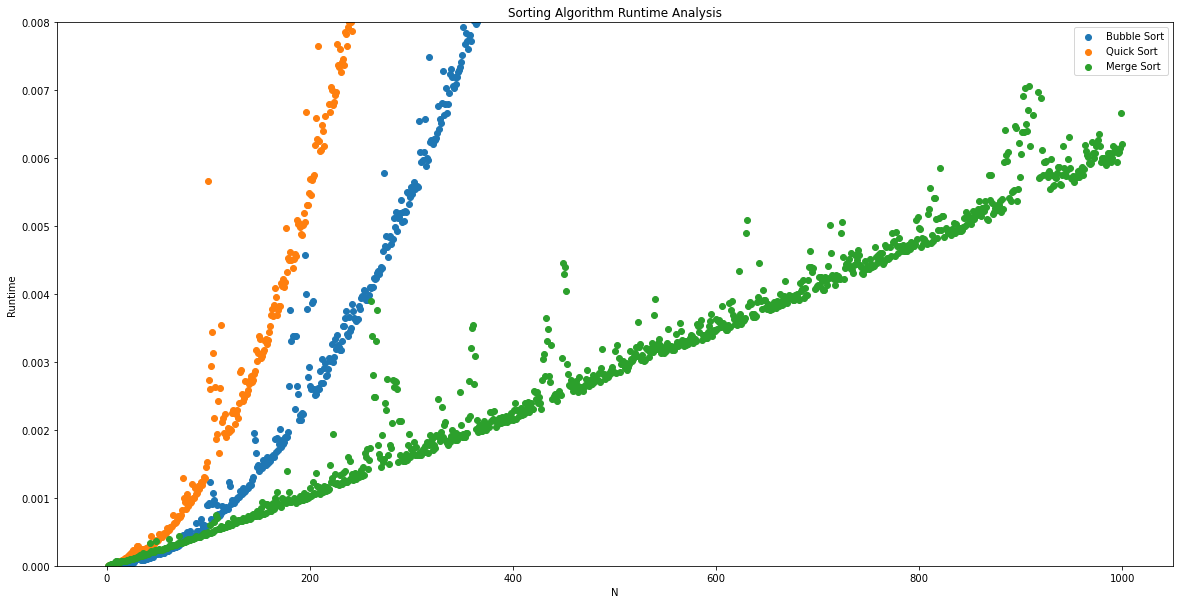

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(n_list, bubble_runtimes, label="Bubble Sort")
ax.scatter(n_list, quick_sort_runtimes, label="Quick Sort")
ax.scatter(n_list, merge_sort_runtimes, label="Merge Sort")
plt.legend()
plt.xlabel("N")
plt.ylabel("Runtime")
plt.title("Sorting Algorithm Runtime Analysis")
plt.ylim(0, 0.008)

### Section 1.6: Discussion of results